# A Simple Autoencoder

We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, we pass input data through an encoder that makes a compressed representation of the input. Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder and decoder will be built with neural networks, then trained on example data.

![Autoencoder](assets/autoencoder_1.png)

In this notebook, we'll be build a simple network architecture for the encoder and decoder. Let's get started by importing our libraries and getting the dataset.

In [7]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [8]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Below I'm plotting an example image from the MNIST dataset. These are 28x28 grayscale images of handwritten digits.

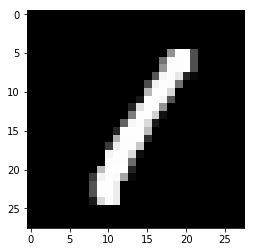

In [12]:
img = mnist.train.images[3]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

We'll train an autoencoder with these images by flattening them into 784 length vectors. The images from this dataset are already normalized such that the values are between 0 and 1. Let's start by building basically the simplest autoencoder with a **single ReLU hidden layer**. This layer will be used as the compressed representation. Then, the encoder is the input layer and the hidden layer. The decoder is the hidden layer and the output layer. Since the images are normalized between 0 and 1, we need to use a **sigmoid activation on the output layer** to get values matching the input.

![Autoencoder architecture](assets/simple_autoencoder.png)


> **Exercise:** Build the graph for the autoencoder in the cell below. The input images will be flattened into 784 length vectors. The targets are the same as the inputs. And there should be one hidden layer with a ReLU activation and an output layer with a sigmoid activation. Feel free to use TensorFlow's higher level API, `tf.layers`. For instance, you would use [`tf.layers.dense(inputs, units, activation=tf.nn.relu)`](https://www.tensorflow.org/api_docs/python/tf/layers/dense) to create a fully connected layer with a ReLU activation. The loss should be calculated with the cross-entropy loss, there is a convenient TensorFlow function for this `tf.nn.sigmoid_cross_entropy_with_logits` ([documentation](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits)). You should note that `tf.nn.sigmoid_cross_entropy_with_logits` takes the logits, but to get the reconstructed images you'll need to pass the logits through the sigmoid function.

In [17]:
# Size of the encoding layer (the hidden layer)
encoding_dim = 32 # feel free to change this value

image_size = mnist.train.images.shape[1]

# Input and target placeholders
inputs_ = tf.placeholder(tf.float32, [None, image_size], name='inputs')
targets_ = tf.placeholder(tf.float32, [None, image_size], name='targets')

# Output of hidden layer, single fully connected layer here with ReLU activation
encoded = tf.layers.dense(inputs_, encoding_dim, activation=tf.nn.relu)

# Output layer logits, fully connected layer with no activation
logits = tf.layers.dense(encoded, 784, activation=None)
# Sigmoid output from logits
decoded = tf.sigmoid(logits)

# Sigmoid cross-entropy loss
loss = tf.nn.sigmoid_cross_entropy_with_logits(labels = targets_, logits = logits)
# Mean of the loss
cost = tf.reduce_mean(loss)

# Adam optimizer
opt = tf.train.AdamOptimizer().minimize(cost)

## Training

In [18]:
# Create the session
sess = tf.Session()

Here I'll write a bit of code to train the network. I'm not too interested in validation here, so I'll just monitor the training loss. 

Calling `mnist.train.next_batch(batch_size)` will return a tuple of `(images, labels)`. We're not concerned with the labels here, we just need the images. Otherwise this is pretty straightfoward training with TensorFlow. We initialize the variables with `sess.run(tf.global_variables_initializer())`. Then, run the optimizer and get the loss with `batch_cost, _ = sess.run([cost, opt], feed_dict=feed)`.

In [19]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.6942
Epoch: 1/20... Training loss: 0.6909
Epoch: 1/20... Training loss: 0.6875
Epoch: 1/20... Training loss: 0.6844
Epoch: 1/20... Training loss: 0.6800
Epoch: 1/20... Training loss: 0.6754
Epoch: 1/20... Training loss: 0.6688
Epoch: 1/20... Training loss: 0.6616
Epoch: 1/20... Training loss: 0.6538
Epoch: 1/20... Training loss: 0.6433
Epoch: 1/20... Training loss: 0.6319
Epoch: 1/20... Training loss: 0.6184
Epoch: 1/20... Training loss: 0.6041
Epoch: 1/20... Training loss: 0.5909
Epoch: 1/20... Training loss: 0.5765
Epoch: 1/20... Training loss: 0.5571
Epoch: 1/20... Training loss: 0.5402
Epoch: 1/20... Training loss: 0.5208
Epoch: 1/20... Training loss: 0.5024
Epoch: 1/20... Training loss: 0.4840
Epoch: 1/20... Training loss: 0.4626
Epoch: 1/20... Training loss: 0.4505
Epoch: 1/20... Training loss: 0.4332
Epoch: 1/20... Training loss: 0.4219
Epoch: 1/20... Training loss: 0.3994
Epoch: 1/20... Training loss: 0.3908
Epoch: 1/20... Training loss: 0.3746
E

Epoch: 1/20... Training loss: 0.1952
Epoch: 1/20... Training loss: 0.1961
Epoch: 1/20... Training loss: 0.1896
Epoch: 1/20... Training loss: 0.1985
Epoch: 1/20... Training loss: 0.1890
Epoch: 1/20... Training loss: 0.1915
Epoch: 1/20... Training loss: 0.1818
Epoch: 1/20... Training loss: 0.1932
Epoch: 1/20... Training loss: 0.1975
Epoch: 1/20... Training loss: 0.1890
Epoch: 1/20... Training loss: 0.1890
Epoch: 1/20... Training loss: 0.1915
Epoch: 1/20... Training loss: 0.1924
Epoch: 1/20... Training loss: 0.1867
Epoch: 1/20... Training loss: 0.1933
Epoch: 1/20... Training loss: 0.1836
Epoch: 1/20... Training loss: 0.1893
Epoch: 1/20... Training loss: 0.1828
Epoch: 1/20... Training loss: 0.1895
Epoch: 1/20... Training loss: 0.1960
Epoch: 1/20... Training loss: 0.1937
Epoch: 1/20... Training loss: 0.1939
Epoch: 1/20... Training loss: 0.1957
Epoch: 1/20... Training loss: 0.1937
Epoch: 1/20... Training loss: 0.1886
Epoch: 1/20... Training loss: 0.1937
Epoch: 1/20... Training loss: 0.1896
E

Epoch: 2/20... Training loss: 0.1443
Epoch: 2/20... Training loss: 0.1558
Epoch: 2/20... Training loss: 0.1561
Epoch: 2/20... Training loss: 0.1554
Epoch: 2/20... Training loss: 0.1584
Epoch: 2/20... Training loss: 0.1561
Epoch: 2/20... Training loss: 0.1502
Epoch: 2/20... Training loss: 0.1596
Epoch: 2/20... Training loss: 0.1603
Epoch: 2/20... Training loss: 0.1557
Epoch: 2/20... Training loss: 0.1545
Epoch: 2/20... Training loss: 0.1538
Epoch: 2/20... Training loss: 0.1591
Epoch: 2/20... Training loss: 0.1514
Epoch: 2/20... Training loss: 0.1535
Epoch: 2/20... Training loss: 0.1520
Epoch: 2/20... Training loss: 0.1560
Epoch: 2/20... Training loss: 0.1546
Epoch: 2/20... Training loss: 0.1558
Epoch: 2/20... Training loss: 0.1575
Epoch: 2/20... Training loss: 0.1561
Epoch: 2/20... Training loss: 0.1504
Epoch: 2/20... Training loss: 0.1578
Epoch: 2/20... Training loss: 0.1555
Epoch: 2/20... Training loss: 0.1534
Epoch: 2/20... Training loss: 0.1529
Epoch: 2/20... Training loss: 0.1562
E

Epoch: 3/20... Training loss: 0.1400
Epoch: 3/20... Training loss: 0.1374
Epoch: 3/20... Training loss: 0.1401
Epoch: 3/20... Training loss: 0.1368
Epoch: 3/20... Training loss: 0.1392
Epoch: 3/20... Training loss: 0.1318
Epoch: 3/20... Training loss: 0.1353
Epoch: 3/20... Training loss: 0.1334
Epoch: 3/20... Training loss: 0.1388
Epoch: 3/20... Training loss: 0.1294
Epoch: 3/20... Training loss: 0.1327
Epoch: 3/20... Training loss: 0.1361
Epoch: 3/20... Training loss: 0.1402
Epoch: 3/20... Training loss: 0.1389
Epoch: 3/20... Training loss: 0.1345
Epoch: 3/20... Training loss: 0.1339
Epoch: 3/20... Training loss: 0.1318
Epoch: 3/20... Training loss: 0.1337
Epoch: 3/20... Training loss: 0.1370
Epoch: 3/20... Training loss: 0.1336
Epoch: 3/20... Training loss: 0.1353
Epoch: 3/20... Training loss: 0.1357
Epoch: 3/20... Training loss: 0.1396
Epoch: 3/20... Training loss: 0.1358
Epoch: 3/20... Training loss: 0.1407
Epoch: 3/20... Training loss: 0.1387
Epoch: 3/20... Training loss: 0.1335
E

Epoch: 4/20... Training loss: 0.1249
Epoch: 4/20... Training loss: 0.1235
Epoch: 4/20... Training loss: 0.1317
Epoch: 4/20... Training loss: 0.1251
Epoch: 4/20... Training loss: 0.1223
Epoch: 4/20... Training loss: 0.1241
Epoch: 4/20... Training loss: 0.1278
Epoch: 4/20... Training loss: 0.1279
Epoch: 4/20... Training loss: 0.1230
Epoch: 4/20... Training loss: 0.1226
Epoch: 4/20... Training loss: 0.1265
Epoch: 4/20... Training loss: 0.1315
Epoch: 4/20... Training loss: 0.1252
Epoch: 4/20... Training loss: 0.1285
Epoch: 4/20... Training loss: 0.1247
Epoch: 4/20... Training loss: 0.1262
Epoch: 4/20... Training loss: 0.1212
Epoch: 4/20... Training loss: 0.1213
Epoch: 4/20... Training loss: 0.1210
Epoch: 4/20... Training loss: 0.1258
Epoch: 4/20... Training loss: 0.1222
Epoch: 4/20... Training loss: 0.1254
Epoch: 4/20... Training loss: 0.1200
Epoch: 4/20... Training loss: 0.1260
Epoch: 4/20... Training loss: 0.1187
Epoch: 4/20... Training loss: 0.1266
Epoch: 4/20... Training loss: 0.1229
E

Epoch: 4/20... Training loss: 0.1132
Epoch: 4/20... Training loss: 0.1188
Epoch: 4/20... Training loss: 0.1160
Epoch: 4/20... Training loss: 0.1168
Epoch: 4/20... Training loss: 0.1203
Epoch: 4/20... Training loss: 0.1154
Epoch: 4/20... Training loss: 0.1147
Epoch: 4/20... Training loss: 0.1142
Epoch: 4/20... Training loss: 0.1160
Epoch: 4/20... Training loss: 0.1112
Epoch: 4/20... Training loss: 0.1152
Epoch: 4/20... Training loss: 0.1151
Epoch: 4/20... Training loss: 0.1201
Epoch: 4/20... Training loss: 0.1160
Epoch: 4/20... Training loss: 0.1202
Epoch: 4/20... Training loss: 0.1148
Epoch: 4/20... Training loss: 0.1184
Epoch: 4/20... Training loss: 0.1187
Epoch: 4/20... Training loss: 0.1185
Epoch: 4/20... Training loss: 0.1118
Epoch: 4/20... Training loss: 0.1160
Epoch: 4/20... Training loss: 0.1131
Epoch: 4/20... Training loss: 0.1146
Epoch: 4/20... Training loss: 0.1154
Epoch: 4/20... Training loss: 0.1180
Epoch: 4/20... Training loss: 0.1175
Epoch: 4/20... Training loss: 0.1150
E

Epoch: 5/20... Training loss: 0.1130
Epoch: 5/20... Training loss: 0.1128
Epoch: 5/20... Training loss: 0.1141
Epoch: 5/20... Training loss: 0.1089
Epoch: 5/20... Training loss: 0.1117
Epoch: 5/20... Training loss: 0.1085
Epoch: 5/20... Training loss: 0.1116
Epoch: 5/20... Training loss: 0.1095
Epoch: 5/20... Training loss: 0.1115
Epoch: 5/20... Training loss: 0.1110
Epoch: 5/20... Training loss: 0.1089
Epoch: 5/20... Training loss: 0.1121
Epoch: 5/20... Training loss: 0.1104
Epoch: 5/20... Training loss: 0.1115
Epoch: 5/20... Training loss: 0.1110
Epoch: 5/20... Training loss: 0.1062
Epoch: 5/20... Training loss: 0.1080
Epoch: 5/20... Training loss: 0.1123
Epoch: 5/20... Training loss: 0.1116
Epoch: 5/20... Training loss: 0.1107
Epoch: 5/20... Training loss: 0.1085
Epoch: 5/20... Training loss: 0.1145
Epoch: 5/20... Training loss: 0.1144
Epoch: 5/20... Training loss: 0.1095
Epoch: 5/20... Training loss: 0.1111
Epoch: 5/20... Training loss: 0.1113
Epoch: 5/20... Training loss: 0.1102
E

Epoch: 6/20... Training loss: 0.1077
Epoch: 6/20... Training loss: 0.1073
Epoch: 6/20... Training loss: 0.1034
Epoch: 6/20... Training loss: 0.1060
Epoch: 6/20... Training loss: 0.1013
Epoch: 6/20... Training loss: 0.1056
Epoch: 6/20... Training loss: 0.1039
Epoch: 6/20... Training loss: 0.1044
Epoch: 6/20... Training loss: 0.1083
Epoch: 6/20... Training loss: 0.1043
Epoch: 6/20... Training loss: 0.1000
Epoch: 6/20... Training loss: 0.1073
Epoch: 6/20... Training loss: 0.1052
Epoch: 6/20... Training loss: 0.1061
Epoch: 6/20... Training loss: 0.1030
Epoch: 6/20... Training loss: 0.1082
Epoch: 6/20... Training loss: 0.1094
Epoch: 6/20... Training loss: 0.1045
Epoch: 6/20... Training loss: 0.1077
Epoch: 6/20... Training loss: 0.1055
Epoch: 6/20... Training loss: 0.1076
Epoch: 6/20... Training loss: 0.1037
Epoch: 6/20... Training loss: 0.1080
Epoch: 6/20... Training loss: 0.1039
Epoch: 6/20... Training loss: 0.1088
Epoch: 6/20... Training loss: 0.1027
Epoch: 6/20... Training loss: 0.1042
E

Epoch: 7/20... Training loss: 0.1087
Epoch: 7/20... Training loss: 0.1043
Epoch: 7/20... Training loss: 0.1029
Epoch: 7/20... Training loss: 0.1043
Epoch: 7/20... Training loss: 0.1026
Epoch: 7/20... Training loss: 0.1008
Epoch: 7/20... Training loss: 0.1005
Epoch: 7/20... Training loss: 0.1008
Epoch: 7/20... Training loss: 0.1001
Epoch: 7/20... Training loss: 0.1047
Epoch: 7/20... Training loss: 0.0997
Epoch: 7/20... Training loss: 0.1017
Epoch: 7/20... Training loss: 0.1009
Epoch: 7/20... Training loss: 0.1031
Epoch: 7/20... Training loss: 0.1025
Epoch: 7/20... Training loss: 0.1035
Epoch: 7/20... Training loss: 0.1022
Epoch: 7/20... Training loss: 0.1038
Epoch: 7/20... Training loss: 0.1020
Epoch: 7/20... Training loss: 0.1033
Epoch: 7/20... Training loss: 0.1024
Epoch: 7/20... Training loss: 0.0982
Epoch: 7/20... Training loss: 0.1026
Epoch: 7/20... Training loss: 0.1011
Epoch: 7/20... Training loss: 0.1015
Epoch: 7/20... Training loss: 0.1010
Epoch: 7/20... Training loss: 0.1037
E

Epoch: 7/20... Training loss: 0.1006
Epoch: 7/20... Training loss: 0.1017
Epoch: 8/20... Training loss: 0.0992
Epoch: 8/20... Training loss: 0.0999
Epoch: 8/20... Training loss: 0.0972
Epoch: 8/20... Training loss: 0.1019
Epoch: 8/20... Training loss: 0.0994
Epoch: 8/20... Training loss: 0.0985
Epoch: 8/20... Training loss: 0.0963
Epoch: 8/20... Training loss: 0.1001
Epoch: 8/20... Training loss: 0.1013
Epoch: 8/20... Training loss: 0.1040
Epoch: 8/20... Training loss: 0.1024
Epoch: 8/20... Training loss: 0.0982
Epoch: 8/20... Training loss: 0.0988
Epoch: 8/20... Training loss: 0.1009
Epoch: 8/20... Training loss: 0.0972
Epoch: 8/20... Training loss: 0.0970
Epoch: 8/20... Training loss: 0.0988
Epoch: 8/20... Training loss: 0.0960
Epoch: 8/20... Training loss: 0.0981
Epoch: 8/20... Training loss: 0.0976
Epoch: 8/20... Training loss: 0.0999
Epoch: 8/20... Training loss: 0.0998
Epoch: 8/20... Training loss: 0.1000
Epoch: 8/20... Training loss: 0.0985
Epoch: 8/20... Training loss: 0.0972
E

Epoch: 8/20... Training loss: 0.0993
Epoch: 8/20... Training loss: 0.0978
Epoch: 8/20... Training loss: 0.0967
Epoch: 8/20... Training loss: 0.0975
Epoch: 8/20... Training loss: 0.1002
Epoch: 8/20... Training loss: 0.0976
Epoch: 8/20... Training loss: 0.0975
Epoch: 8/20... Training loss: 0.0983
Epoch: 8/20... Training loss: 0.0977
Epoch: 8/20... Training loss: 0.0986
Epoch: 8/20... Training loss: 0.0966
Epoch: 8/20... Training loss: 0.0963
Epoch: 8/20... Training loss: 0.0938
Epoch: 8/20... Training loss: 0.0986
Epoch: 8/20... Training loss: 0.0973
Epoch: 8/20... Training loss: 0.0999
Epoch: 8/20... Training loss: 0.0992
Epoch: 8/20... Training loss: 0.0973
Epoch: 8/20... Training loss: 0.0982
Epoch: 8/20... Training loss: 0.0978
Epoch: 8/20... Training loss: 0.0966
Epoch: 8/20... Training loss: 0.0988
Epoch: 8/20... Training loss: 0.0993
Epoch: 8/20... Training loss: 0.0980
Epoch: 8/20... Training loss: 0.0963
Epoch: 8/20... Training loss: 0.0986
Epoch: 8/20... Training loss: 0.0963
E

Epoch: 9/20... Training loss: 0.0976
Epoch: 9/20... Training loss: 0.0982
Epoch: 9/20... Training loss: 0.0952
Epoch: 9/20... Training loss: 0.0932
Epoch: 9/20... Training loss: 0.1018
Epoch: 9/20... Training loss: 0.0918
Epoch: 9/20... Training loss: 0.0989
Epoch: 9/20... Training loss: 0.0999
Epoch: 9/20... Training loss: 0.0984
Epoch: 9/20... Training loss: 0.0938
Epoch: 9/20... Training loss: 0.0984
Epoch: 9/20... Training loss: 0.0960
Epoch: 9/20... Training loss: 0.0999
Epoch: 9/20... Training loss: 0.0992
Epoch: 9/20... Training loss: 0.0986
Epoch: 9/20... Training loss: 0.0952
Epoch: 9/20... Training loss: 0.0947
Epoch: 9/20... Training loss: 0.0991
Epoch: 9/20... Training loss: 0.0945
Epoch: 9/20... Training loss: 0.0914
Epoch: 9/20... Training loss: 0.0971
Epoch: 9/20... Training loss: 0.0977
Epoch: 9/20... Training loss: 0.0954
Epoch: 9/20... Training loss: 0.0942
Epoch: 9/20... Training loss: 0.0983
Epoch: 9/20... Training loss: 0.0945
Epoch: 9/20... Training loss: 0.0949
E

Epoch: 10/20... Training loss: 0.0937
Epoch: 10/20... Training loss: 0.0940
Epoch: 10/20... Training loss: 0.0946
Epoch: 10/20... Training loss: 0.0984
Epoch: 10/20... Training loss: 0.0974
Epoch: 10/20... Training loss: 0.0946
Epoch: 10/20... Training loss: 0.0978
Epoch: 10/20... Training loss: 0.0972
Epoch: 10/20... Training loss: 0.0928
Epoch: 10/20... Training loss: 0.0921
Epoch: 10/20... Training loss: 0.0943
Epoch: 10/20... Training loss: 0.0964
Epoch: 10/20... Training loss: 0.0961
Epoch: 10/20... Training loss: 0.0962
Epoch: 10/20... Training loss: 0.0959
Epoch: 10/20... Training loss: 0.0973
Epoch: 10/20... Training loss: 0.0936
Epoch: 10/20... Training loss: 0.0930
Epoch: 10/20... Training loss: 0.0933
Epoch: 10/20... Training loss: 0.0965
Epoch: 10/20... Training loss: 0.0962
Epoch: 10/20... Training loss: 0.0941
Epoch: 10/20... Training loss: 0.0943
Epoch: 10/20... Training loss: 0.0945
Epoch: 10/20... Training loss: 0.0956
Epoch: 10/20... Training loss: 0.0961
Epoch: 10/20

Epoch: 11/20... Training loss: 0.0958
Epoch: 11/20... Training loss: 0.0957
Epoch: 11/20... Training loss: 0.0986
Epoch: 11/20... Training loss: 0.0930
Epoch: 11/20... Training loss: 0.0996
Epoch: 11/20... Training loss: 0.0942
Epoch: 11/20... Training loss: 0.0953
Epoch: 11/20... Training loss: 0.0943
Epoch: 11/20... Training loss: 0.0976
Epoch: 11/20... Training loss: 0.0973
Epoch: 11/20... Training loss: 0.0928
Epoch: 11/20... Training loss: 0.0948
Epoch: 11/20... Training loss: 0.0942
Epoch: 11/20... Training loss: 0.0951
Epoch: 11/20... Training loss: 0.0916
Epoch: 11/20... Training loss: 0.0977
Epoch: 11/20... Training loss: 0.0946
Epoch: 11/20... Training loss: 0.0962
Epoch: 11/20... Training loss: 0.0976
Epoch: 11/20... Training loss: 0.0945
Epoch: 11/20... Training loss: 0.0941
Epoch: 11/20... Training loss: 0.0966
Epoch: 11/20... Training loss: 0.0938
Epoch: 11/20... Training loss: 0.0943
Epoch: 11/20... Training loss: 0.0941
Epoch: 11/20... Training loss: 0.0954
Epoch: 11/20

Epoch: 11/20... Training loss: 0.0974
Epoch: 11/20... Training loss: 0.0941
Epoch: 11/20... Training loss: 0.0969
Epoch: 11/20... Training loss: 0.0962
Epoch: 11/20... Training loss: 0.0938
Epoch: 11/20... Training loss: 0.0931
Epoch: 11/20... Training loss: 0.0968
Epoch: 11/20... Training loss: 0.0934
Epoch: 11/20... Training loss: 0.0952
Epoch: 11/20... Training loss: 0.0939
Epoch: 11/20... Training loss: 0.0959
Epoch: 11/20... Training loss: 0.0946
Epoch: 11/20... Training loss: 0.0943
Epoch: 11/20... Training loss: 0.0972
Epoch: 11/20... Training loss: 0.0970
Epoch: 11/20... Training loss: 0.0972
Epoch: 11/20... Training loss: 0.0968
Epoch: 11/20... Training loss: 0.0937
Epoch: 11/20... Training loss: 0.0925
Epoch: 11/20... Training loss: 0.0957
Epoch: 11/20... Training loss: 0.0904
Epoch: 11/20... Training loss: 0.0938
Epoch: 11/20... Training loss: 0.0930
Epoch: 11/20... Training loss: 0.0912
Epoch: 11/20... Training loss: 0.0929
Epoch: 11/20... Training loss: 0.0950
Epoch: 11/20

Epoch: 12/20... Training loss: 0.1000
Epoch: 12/20... Training loss: 0.0920
Epoch: 12/20... Training loss: 0.0928
Epoch: 12/20... Training loss: 0.0937
Epoch: 12/20... Training loss: 0.0963
Epoch: 12/20... Training loss: 0.0908
Epoch: 12/20... Training loss: 0.0936
Epoch: 12/20... Training loss: 0.0958
Epoch: 12/20... Training loss: 0.0981
Epoch: 12/20... Training loss: 0.0953
Epoch: 12/20... Training loss: 0.0943
Epoch: 12/20... Training loss: 0.0946
Epoch: 12/20... Training loss: 0.0945
Epoch: 12/20... Training loss: 0.0945
Epoch: 12/20... Training loss: 0.0933
Epoch: 12/20... Training loss: 0.0957
Epoch: 12/20... Training loss: 0.0957
Epoch: 12/20... Training loss: 0.0925
Epoch: 12/20... Training loss: 0.0948
Epoch: 12/20... Training loss: 0.0947
Epoch: 12/20... Training loss: 0.0943
Epoch: 12/20... Training loss: 0.0960
Epoch: 12/20... Training loss: 0.0899
Epoch: 12/20... Training loss: 0.0920
Epoch: 12/20... Training loss: 0.0942
Epoch: 12/20... Training loss: 0.0918
Epoch: 12/20

Epoch: 13/20... Training loss: 0.0948
Epoch: 13/20... Training loss: 0.0885
Epoch: 13/20... Training loss: 0.0902
Epoch: 13/20... Training loss: 0.0988
Epoch: 13/20... Training loss: 0.0958
Epoch: 13/20... Training loss: 0.0932
Epoch: 13/20... Training loss: 0.0946
Epoch: 13/20... Training loss: 0.0932
Epoch: 13/20... Training loss: 0.0907
Epoch: 13/20... Training loss: 0.0926
Epoch: 13/20... Training loss: 0.0969
Epoch: 13/20... Training loss: 0.0951
Epoch: 13/20... Training loss: 0.0936
Epoch: 13/20... Training loss: 0.0946
Epoch: 13/20... Training loss: 0.0908
Epoch: 13/20... Training loss: 0.0920
Epoch: 13/20... Training loss: 0.0905
Epoch: 13/20... Training loss: 0.0947
Epoch: 13/20... Training loss: 0.0921
Epoch: 13/20... Training loss: 0.0922
Epoch: 13/20... Training loss: 0.0946
Epoch: 13/20... Training loss: 0.0939
Epoch: 13/20... Training loss: 0.0963
Epoch: 13/20... Training loss: 0.0953
Epoch: 13/20... Training loss: 0.0961
Epoch: 13/20... Training loss: 0.0927
Epoch: 13/20

Epoch: 14/20... Training loss: 0.0948
Epoch: 14/20... Training loss: 0.0972
Epoch: 14/20... Training loss: 0.0942
Epoch: 14/20... Training loss: 0.0958
Epoch: 14/20... Training loss: 0.0941
Epoch: 14/20... Training loss: 0.0936
Epoch: 14/20... Training loss: 0.0943
Epoch: 14/20... Training loss: 0.0928
Epoch: 14/20... Training loss: 0.0940
Epoch: 14/20... Training loss: 0.0955
Epoch: 14/20... Training loss: 0.0953
Epoch: 14/20... Training loss: 0.0944
Epoch: 14/20... Training loss: 0.0932
Epoch: 14/20... Training loss: 0.0921
Epoch: 14/20... Training loss: 0.0931
Epoch: 14/20... Training loss: 0.0956
Epoch: 14/20... Training loss: 0.0939
Epoch: 14/20... Training loss: 0.0941
Epoch: 14/20... Training loss: 0.0937
Epoch: 14/20... Training loss: 0.0939
Epoch: 14/20... Training loss: 0.0942
Epoch: 14/20... Training loss: 0.0899
Epoch: 14/20... Training loss: 0.0945
Epoch: 14/20... Training loss: 0.0890
Epoch: 14/20... Training loss: 0.0967
Epoch: 14/20... Training loss: 0.0933
Epoch: 14/20

Epoch: 14/20... Training loss: 0.0942
Epoch: 14/20... Training loss: 0.0919
Epoch: 14/20... Training loss: 0.0941
Epoch: 14/20... Training loss: 0.0956
Epoch: 14/20... Training loss: 0.0963
Epoch: 14/20... Training loss: 0.0935
Epoch: 14/20... Training loss: 0.0889
Epoch: 14/20... Training loss: 0.0931
Epoch: 14/20... Training loss: 0.0967
Epoch: 14/20... Training loss: 0.0930
Epoch: 14/20... Training loss: 0.0920
Epoch: 14/20... Training loss: 0.0952
Epoch: 14/20... Training loss: 0.0917
Epoch: 14/20... Training loss: 0.0930
Epoch: 14/20... Training loss: 0.0962
Epoch: 14/20... Training loss: 0.0951
Epoch: 14/20... Training loss: 0.0922
Epoch: 14/20... Training loss: 0.0938
Epoch: 14/20... Training loss: 0.0952
Epoch: 14/20... Training loss: 0.0963
Epoch: 14/20... Training loss: 0.0940
Epoch: 14/20... Training loss: 0.0938
Epoch: 14/20... Training loss: 0.0940
Epoch: 14/20... Training loss: 0.0898
Epoch: 15/20... Training loss: 0.0904
Epoch: 15/20... Training loss: 0.0912
Epoch: 15/20

Epoch: 15/20... Training loss: 0.0942
Epoch: 15/20... Training loss: 0.0939
Epoch: 15/20... Training loss: 0.0925
Epoch: 15/20... Training loss: 0.0930
Epoch: 15/20... Training loss: 0.0919
Epoch: 15/20... Training loss: 0.0946
Epoch: 15/20... Training loss: 0.0935
Epoch: 15/20... Training loss: 0.0887
Epoch: 15/20... Training loss: 0.0927
Epoch: 15/20... Training loss: 0.0938
Epoch: 15/20... Training loss: 0.0959
Epoch: 15/20... Training loss: 0.0932
Epoch: 15/20... Training loss: 0.0940
Epoch: 15/20... Training loss: 0.0967
Epoch: 15/20... Training loss: 0.0951
Epoch: 15/20... Training loss: 0.0947
Epoch: 15/20... Training loss: 0.0953
Epoch: 15/20... Training loss: 0.0925
Epoch: 15/20... Training loss: 0.0934
Epoch: 15/20... Training loss: 0.0949
Epoch: 15/20... Training loss: 0.0959
Epoch: 15/20... Training loss: 0.0960
Epoch: 15/20... Training loss: 0.0912
Epoch: 15/20... Training loss: 0.0930
Epoch: 15/20... Training loss: 0.0951
Epoch: 15/20... Training loss: 0.0905
Epoch: 15/20

Epoch: 16/20... Training loss: 0.0928
Epoch: 16/20... Training loss: 0.0947
Epoch: 16/20... Training loss: 0.0956
Epoch: 16/20... Training loss: 0.0902
Epoch: 16/20... Training loss: 0.0958
Epoch: 16/20... Training loss: 0.0907
Epoch: 16/20... Training loss: 0.1000
Epoch: 16/20... Training loss: 0.0924
Epoch: 16/20... Training loss: 0.0947
Epoch: 16/20... Training loss: 0.0954
Epoch: 16/20... Training loss: 0.0959
Epoch: 16/20... Training loss: 0.0945
Epoch: 16/20... Training loss: 0.0915
Epoch: 16/20... Training loss: 0.0977
Epoch: 16/20... Training loss: 0.0911
Epoch: 16/20... Training loss: 0.0902
Epoch: 16/20... Training loss: 0.0921
Epoch: 16/20... Training loss: 0.0934
Epoch: 16/20... Training loss: 0.0949
Epoch: 16/20... Training loss: 0.0960
Epoch: 16/20... Training loss: 0.0955
Epoch: 16/20... Training loss: 0.0952
Epoch: 16/20... Training loss: 0.0959
Epoch: 16/20... Training loss: 0.0924
Epoch: 16/20... Training loss: 0.0960
Epoch: 16/20... Training loss: 0.0920
Epoch: 16/20

Epoch: 17/20... Training loss: 0.0966
Epoch: 17/20... Training loss: 0.0915
Epoch: 17/20... Training loss: 0.0941
Epoch: 17/20... Training loss: 0.0957
Epoch: 17/20... Training loss: 0.0913
Epoch: 17/20... Training loss: 0.0926
Epoch: 17/20... Training loss: 0.0913
Epoch: 17/20... Training loss: 0.0922
Epoch: 17/20... Training loss: 0.0947
Epoch: 17/20... Training loss: 0.0921
Epoch: 17/20... Training loss: 0.0913
Epoch: 17/20... Training loss: 0.0896
Epoch: 17/20... Training loss: 0.0922
Epoch: 17/20... Training loss: 0.0938
Epoch: 17/20... Training loss: 0.0948
Epoch: 17/20... Training loss: 0.0914
Epoch: 17/20... Training loss: 0.0926
Epoch: 17/20... Training loss: 0.0890
Epoch: 17/20... Training loss: 0.0932
Epoch: 17/20... Training loss: 0.0929
Epoch: 17/20... Training loss: 0.0961
Epoch: 17/20... Training loss: 0.0915
Epoch: 17/20... Training loss: 0.0938
Epoch: 17/20... Training loss: 0.0949
Epoch: 17/20... Training loss: 0.0931
Epoch: 17/20... Training loss: 0.0939
Epoch: 17/20

Epoch: 17/20... Training loss: 0.0940
Epoch: 17/20... Training loss: 0.0963
Epoch: 17/20... Training loss: 0.0939
Epoch: 17/20... Training loss: 0.0926
Epoch: 17/20... Training loss: 0.0994
Epoch: 17/20... Training loss: 0.0912
Epoch: 17/20... Training loss: 0.0915
Epoch: 17/20... Training loss: 0.0952
Epoch: 17/20... Training loss: 0.0945
Epoch: 17/20... Training loss: 0.0936
Epoch: 17/20... Training loss: 0.0899
Epoch: 17/20... Training loss: 0.0933
Epoch: 17/20... Training loss: 0.0903
Epoch: 17/20... Training loss: 0.0894
Epoch: 17/20... Training loss: 0.0937
Epoch: 17/20... Training loss: 0.0910
Epoch: 17/20... Training loss: 0.0946
Epoch: 17/20... Training loss: 0.0946
Epoch: 17/20... Training loss: 0.0916
Epoch: 17/20... Training loss: 0.0919
Epoch: 17/20... Training loss: 0.0933
Epoch: 17/20... Training loss: 0.0956
Epoch: 17/20... Training loss: 0.0956
Epoch: 18/20... Training loss: 0.0952
Epoch: 18/20... Training loss: 0.0945
Epoch: 18/20... Training loss: 0.0941
Epoch: 18/20

Epoch: 18/20... Training loss: 0.0917
Epoch: 18/20... Training loss: 0.0939
Epoch: 18/20... Training loss: 0.0887
Epoch: 18/20... Training loss: 0.0923
Epoch: 18/20... Training loss: 0.0920
Epoch: 18/20... Training loss: 0.0933
Epoch: 18/20... Training loss: 0.0944
Epoch: 18/20... Training loss: 0.0944
Epoch: 18/20... Training loss: 0.0934
Epoch: 18/20... Training loss: 0.0915
Epoch: 18/20... Training loss: 0.0960
Epoch: 18/20... Training loss: 0.0925
Epoch: 18/20... Training loss: 0.0953
Epoch: 18/20... Training loss: 0.0937
Epoch: 18/20... Training loss: 0.0953
Epoch: 18/20... Training loss: 0.0932
Epoch: 18/20... Training loss: 0.0914
Epoch: 18/20... Training loss: 0.0951
Epoch: 18/20... Training loss: 0.0937
Epoch: 18/20... Training loss: 0.0940
Epoch: 18/20... Training loss: 0.0928
Epoch: 18/20... Training loss: 0.0924
Epoch: 18/20... Training loss: 0.0940
Epoch: 18/20... Training loss: 0.0910
Epoch: 18/20... Training loss: 0.0936
Epoch: 18/20... Training loss: 0.0931
Epoch: 18/20

Epoch: 19/20... Training loss: 0.0920
Epoch: 19/20... Training loss: 0.0925
Epoch: 19/20... Training loss: 0.0927
Epoch: 19/20... Training loss: 0.0944
Epoch: 19/20... Training loss: 0.0907
Epoch: 19/20... Training loss: 0.0967
Epoch: 19/20... Training loss: 0.0946
Epoch: 19/20... Training loss: 0.0941
Epoch: 19/20... Training loss: 0.0899
Epoch: 19/20... Training loss: 0.0944
Epoch: 19/20... Training loss: 0.0924
Epoch: 19/20... Training loss: 0.0920
Epoch: 19/20... Training loss: 0.0914
Epoch: 19/20... Training loss: 0.0955
Epoch: 19/20... Training loss: 0.0921
Epoch: 19/20... Training loss: 0.0934
Epoch: 19/20... Training loss: 0.0892
Epoch: 19/20... Training loss: 0.0928
Epoch: 19/20... Training loss: 0.0914
Epoch: 19/20... Training loss: 0.0967
Epoch: 19/20... Training loss: 0.0889
Epoch: 19/20... Training loss: 0.0916
Epoch: 19/20... Training loss: 0.0938
Epoch: 19/20... Training loss: 0.0916
Epoch: 19/20... Training loss: 0.0947
Epoch: 19/20... Training loss: 0.0918
Epoch: 19/20

Epoch: 20/20... Training loss: 0.0914
Epoch: 20/20... Training loss: 0.0927
Epoch: 20/20... Training loss: 0.0944
Epoch: 20/20... Training loss: 0.0960
Epoch: 20/20... Training loss: 0.0921
Epoch: 20/20... Training loss: 0.0931
Epoch: 20/20... Training loss: 0.0933
Epoch: 20/20... Training loss: 0.0928
Epoch: 20/20... Training loss: 0.0939
Epoch: 20/20... Training loss: 0.0945
Epoch: 20/20... Training loss: 0.0913
Epoch: 20/20... Training loss: 0.0966
Epoch: 20/20... Training loss: 0.0924
Epoch: 20/20... Training loss: 0.0998
Epoch: 20/20... Training loss: 0.0910
Epoch: 20/20... Training loss: 0.0940
Epoch: 20/20... Training loss: 0.0956
Epoch: 20/20... Training loss: 0.0930
Epoch: 20/20... Training loss: 0.0914
Epoch: 20/20... Training loss: 0.0926
Epoch: 20/20... Training loss: 0.0949
Epoch: 20/20... Training loss: 0.0958
Epoch: 20/20... Training loss: 0.0896
Epoch: 20/20... Training loss: 0.0931
Epoch: 20/20... Training loss: 0.0953
Epoch: 20/20... Training loss: 0.0952
Epoch: 20/20

Epoch: 20/20... Training loss: 0.0922
Epoch: 20/20... Training loss: 0.0911
Epoch: 20/20... Training loss: 0.0949
Epoch: 20/20... Training loss: 0.0932
Epoch: 20/20... Training loss: 0.0923
Epoch: 20/20... Training loss: 0.0956
Epoch: 20/20... Training loss: 0.0886
Epoch: 20/20... Training loss: 0.0910
Epoch: 20/20... Training loss: 0.0925
Epoch: 20/20... Training loss: 0.0958
Epoch: 20/20... Training loss: 0.0916
Epoch: 20/20... Training loss: 0.0931
Epoch: 20/20... Training loss: 0.0937
Epoch: 20/20... Training loss: 0.0946
Epoch: 20/20... Training loss: 0.0926
Epoch: 20/20... Training loss: 0.0953
Epoch: 20/20... Training loss: 0.0902
Epoch: 20/20... Training loss: 0.0970
Epoch: 20/20... Training loss: 0.0933
Epoch: 20/20... Training loss: 0.0919
Epoch: 20/20... Training loss: 0.0945
Epoch: 20/20... Training loss: 0.0936
Epoch: 20/20... Training loss: 0.0949
Epoch: 20/20... Training loss: 0.0934
Epoch: 20/20... Training loss: 0.0903
Epoch: 20/20... Training loss: 0.0928
Epoch: 20/20

## Checking out the results

Below I've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts.

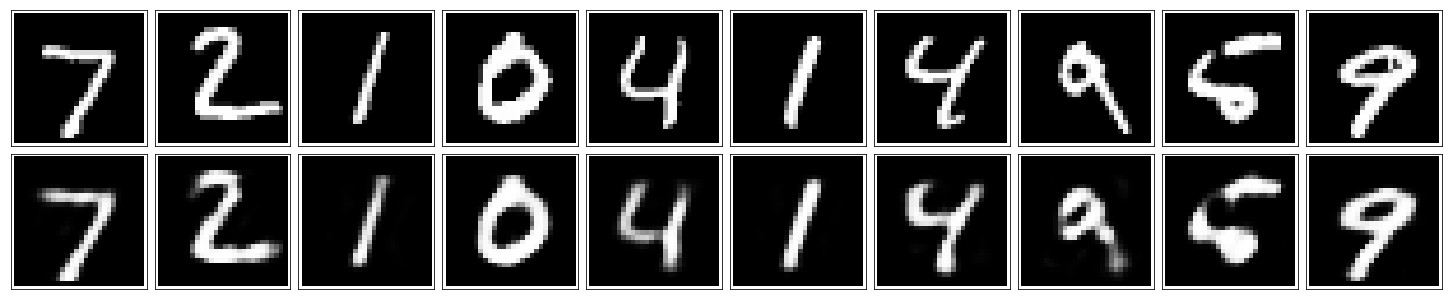

In [20]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [9]:
sess.close()

## Up Next

We're dealing with images here, so we can (usually) get better performance using convolution layers. So, next we'll build a better autoencoder with convolutional layers.

In practice, autoencoders aren't actually better at compression compared to typical methods like JPEGs and MP3s. But, they are being used for noise reduction, which you'll also build.